## Python imports.

In [1]:
import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib import collections as matcoll

## Data gathering and cleaning.

In [2]:
website = 'https://www.nationalchickencouncil.org/about-the-industry/statistics/per-capita-consumption-of-poultry-and-livestock-1965-to-estimated-2012-in-pounds/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

request = requests.get(website, headers=header) # get the html data from the website.
all_tables = pd.read_html(request.text) # we can use pandas to parse the tables in the html.

In [3]:
data = all_tables[0] # the table we want is in the first position.

In [4]:
data.head(3)

,Year,Beef,Pork,Total Red Meat,Broilers,Other Chicken,Total Chicken,Turkey,Total Poultry,Total Red Meat & Poultry,Commercial Fish & Shell-Fish
0,1960,63.3,59.1,133.0,23.6,4.4,28.0,6.2,34.2,167.2,10.3
1,1965,74.7,51.5,133.9,32.4,4.0,36.4,7.6,44.0,177.9,10.9
2,1966,78.1,50.3,135.8,32.1,3.7,35.8,7.9,43.7,179.5,10.9


In [5]:
# we are only interested in the columns 'Year', 'Beef' and 'Total Chicken' and the years 1970-2022.
data = (data
        .filter(['Year', 'Beef', 'Total Chicken'])
        .rename(columns={'Year':'year', 'Beef':'beef', 'Total Chicken':'chicken'})
        .query('year > 1969 and year < 2023'))

In [6]:
data.head(2)

,year,beef,chicken
6,1970,84.4,40.1
7,1971,83.9,40.1


In [7]:
data.tail(2)

,year,beef,chicken
57,2021,58.9,98.1
58,2022,58.6,99.3


In [8]:
# this will be later used to plot a line between the two categories - beef and chicken.
x = data['year'].values
y = data[['beef', 'chicken']].values

## Plotting the data.

#### Matplotlib default.

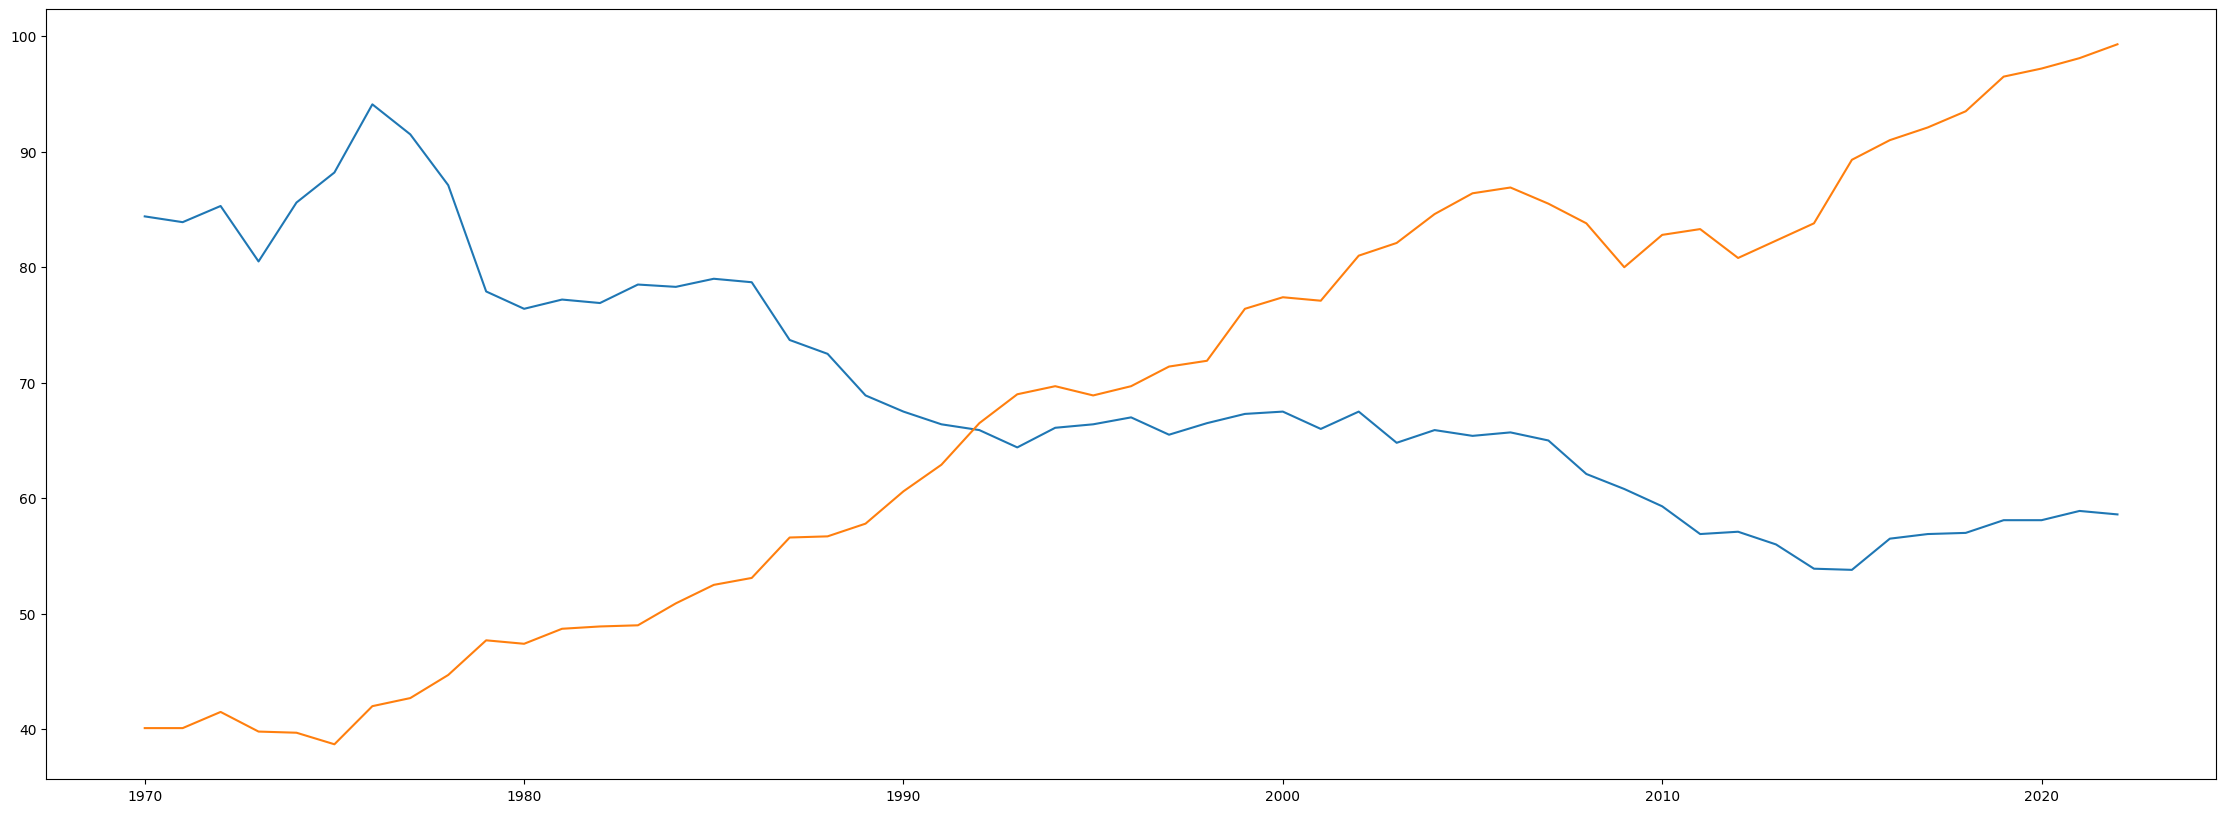

In [9]:
fig, ax = plt.subplots(figsize=(28, 10))

# plot data.
ax.plot(data.year, data.beef)
ax.plot(data.year, data.chicken)

# show plot.
plt.show()

# plt.savefig('line-plot-before.png', dpi = 300, bbox_inches = 'tight')

#### Final Plot.

In [10]:
# Lets define a custom function for coloring text in matplotlib.
# NOTE: this is a workaround since Latex was not available in the system.

def color_title(title, colors, x, y, size, ax = None):
  """Creates custom titles with color"""

  if ax == None:
    ax = plt.gca()

  # initial params
  plt.gcf().canvas.draw()
  transform = ax.transAxes 

  x_position = x
  y_position = y

  for text, color in zip(title, colors):
    title = ax.text(x_position, y_position, text, transform = transform, color = color, size = size)

    bbox = title.get_window_extent().transformed(transform.inverted())
    x_position = bbox.x1

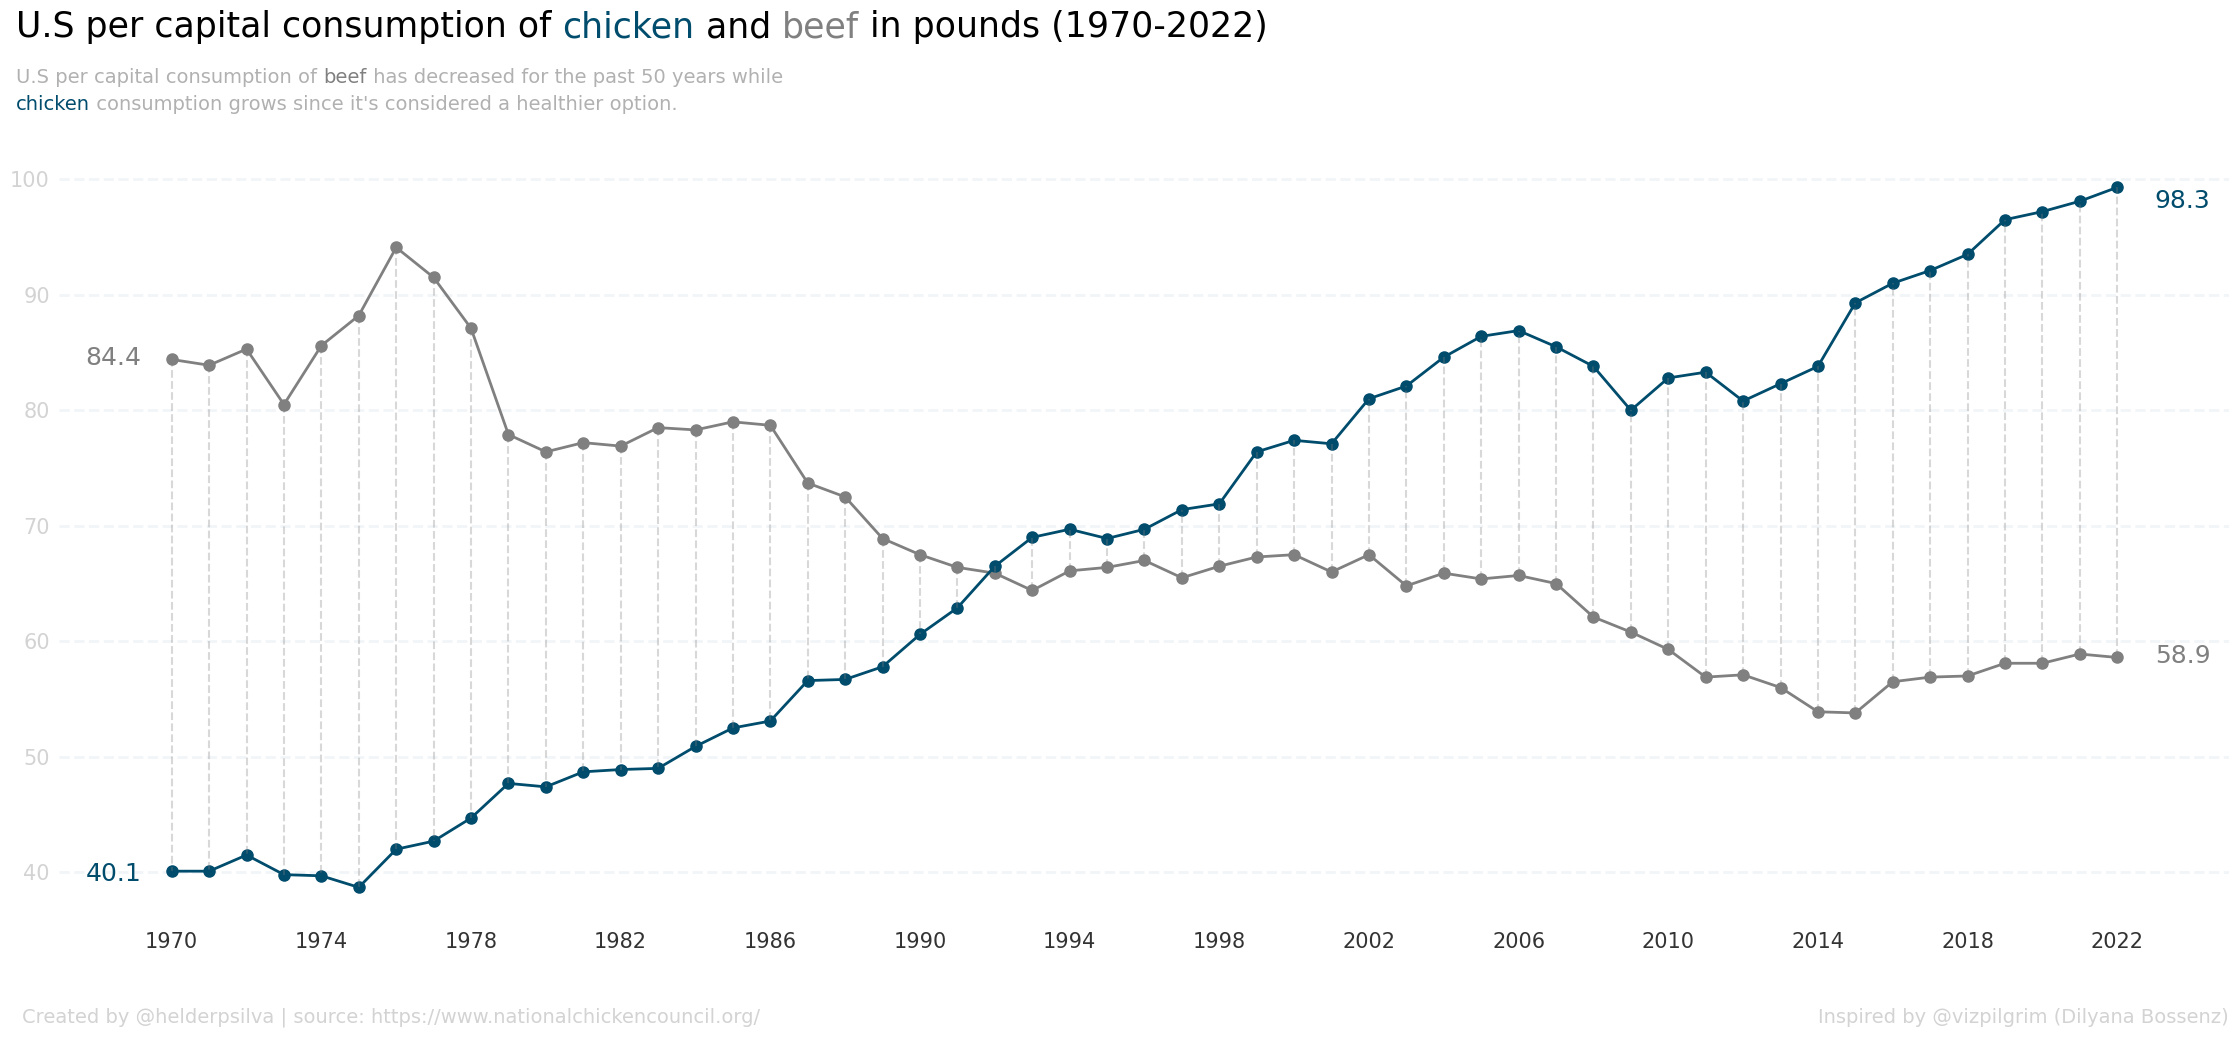

In [11]:
# Add title, description, source and author.

# colors.
blue_color = '#004c6d'
gray_color = 'gray'
lightgray_color = 'lightgray'
darkgray_color = '#333333'

fig, ax = plt.subplots(figsize=(28, 10))

# plot data.
ax.plot(data.year, data.beef, label='Beef', linewidth=2, marker='o', markersize = 8, color = gray_color)
ax.plot(data.year, data.chicken, label='Chicken', linewidth=2, marker='o', markersize = 8, color = blue_color)

# change default limits.
ax.set_xlim(1967, 2025)

# remove axis spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove tick marks.
ax.tick_params( bottom=False, left=False)

# Change tick size.
plt.xticks(np.arange(1970, 2023, 4), fontsize=15, color = darkgray_color) # x axis
plt.yticks(fontsize=15, color = lightgray_color) # y axis

# add horizontal grid.
ax.set_axisbelow(True)
ax.yaxis.grid(color = blue_color, linestyle='dashed', linewidth=2, alpha=0.05)

# custom labels.
# start values.
plt.text(1967.7, 83.9, "84.4", fontsize=18, color = gray_color)
plt.text(1967.7, 39.3, "40.1", fontsize=18, color = blue_color)

# end values.
plt.text(2023, 58.1, "58.9", fontsize=18, color = gray_color)
plt.text(2023, 97.5, "98.3", fontsize=18, color = blue_color)

# add connecting lines.
lines = []
for i, j in zip(x,y):
    pair = [(i, j[0]), (i, j[1])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, linewidth=1.5, linestyle='dashed', colors= gray_color, alpha = 0.3)
ax.add_collection(linecoll)

# add title.
title = ['U.S per capital consumption of ', 'chicken', ' and ', 'beef',' in pounds (1970-2022)'] # title separated based on the color.
title_color = ['k', '#004c6d', 'k', 'gray', 'k'] # list with respective colors.

# custom function for coloring text. (see cell above)
color_title(title, title_color, -0.020,1.15,25,ax)

# add subtitle.
line_one = ['U.S per capital consumption of ','beef',' has decreased for the past 50 years while ']
line_two = ['chicken', ' consumption grows since it\'s considered a healthier option.'] 

line_one_color = ['#B1B1B1', 'gray', '#B1B1B1']
line_two_color = ['#004c6d','#B1B1B1']

color_title(line_one, line_one_color, -0.020,1.09, 14 , ax)
color_title(line_two, line_two_color, -0.020,1.055, 14 , ax)

# add source and author.
plt.text(1966, 27, "Created by @helderpsilva | source: https://www.nationalchickencouncil.org/", fontsize=14, color = lightgray_color)
plt.text(2014, 27, "Inspired by @vizpilgrim (Dilyana Bossenz)" , fontsize=14, color = lightgray_color)

# show plot.
plt.show()

# plt.savefig('line-plot-after.png', dpi = 300, bbox_inches = 'tight')

#### Additional Experiments.

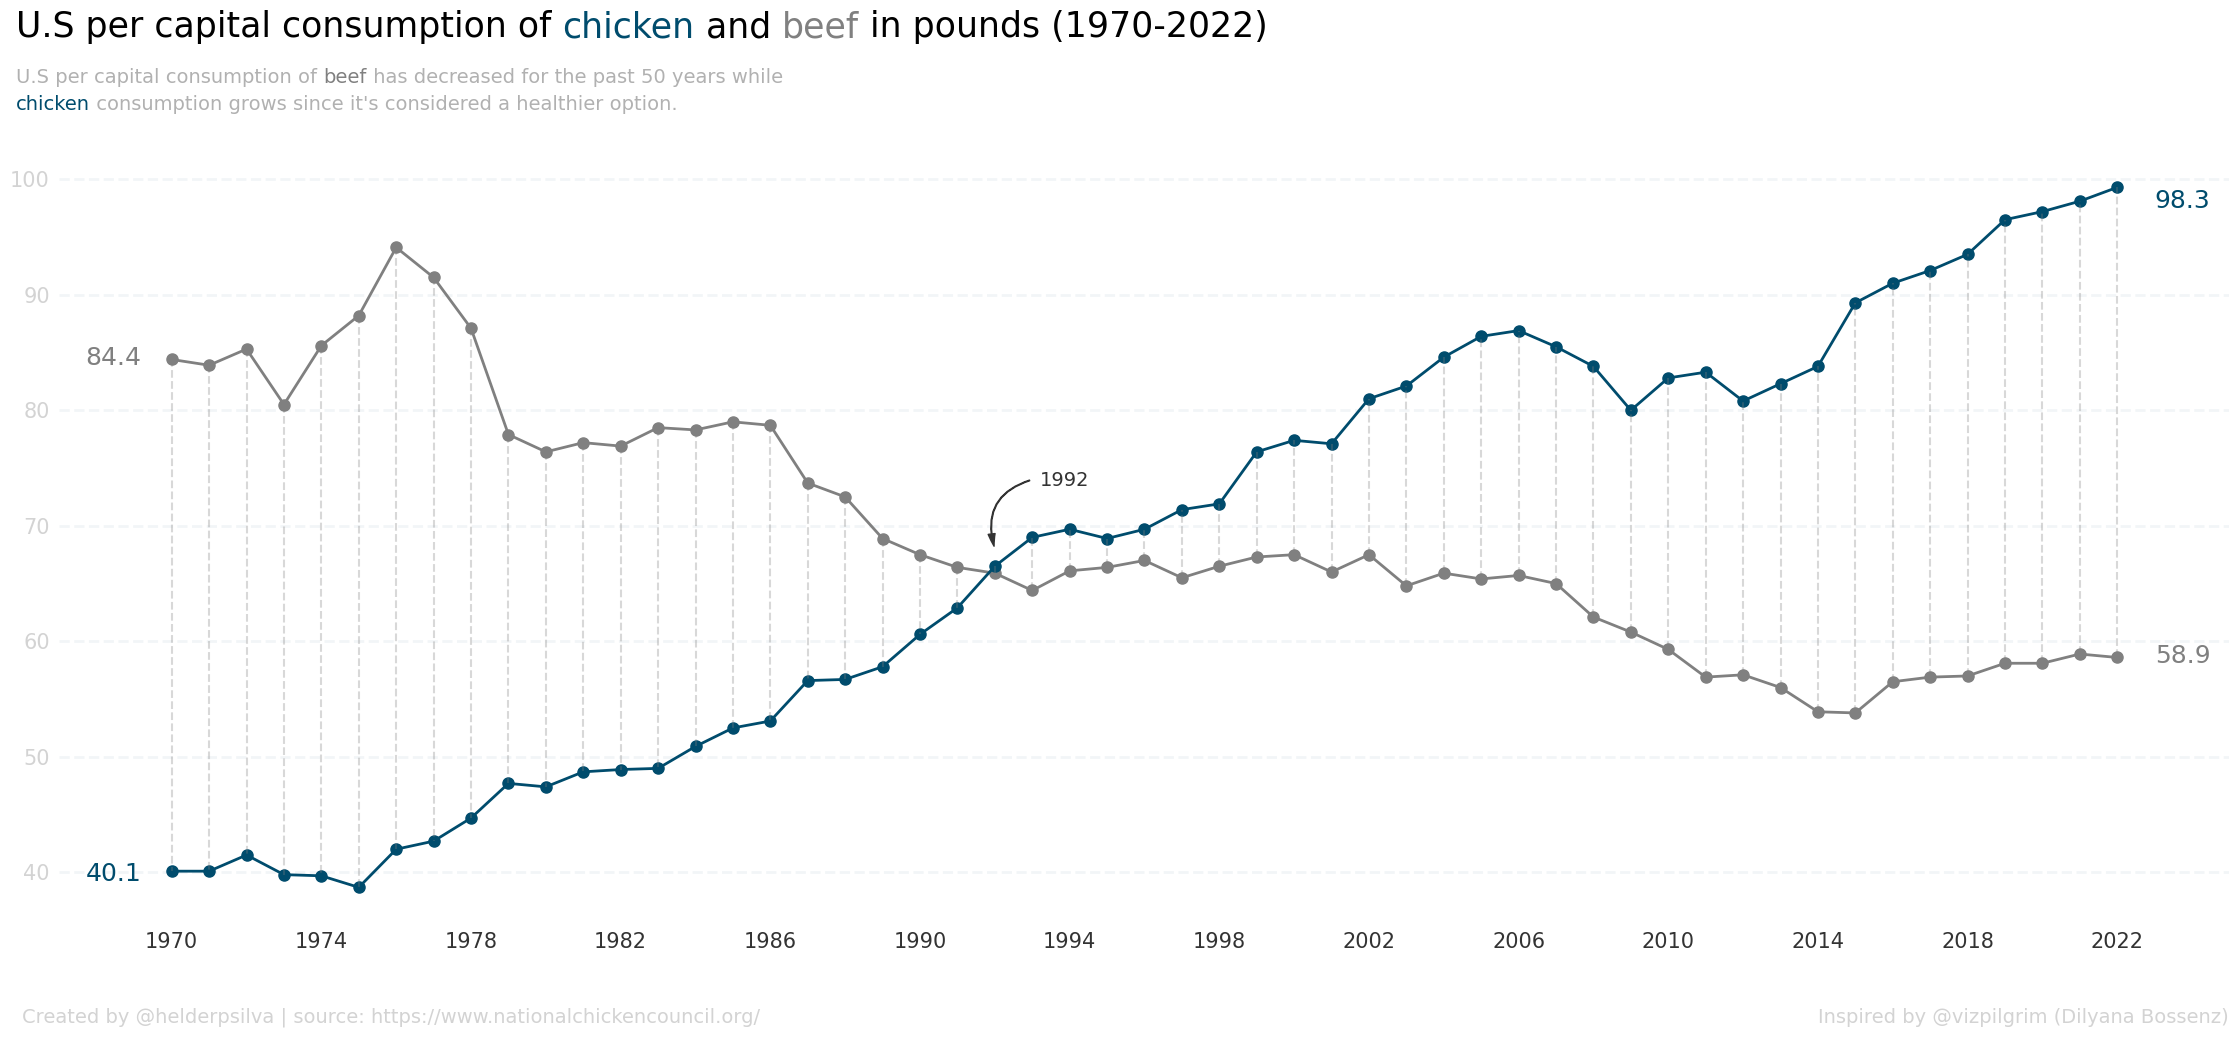

In [12]:
# Add arrow indicating the lines intersection.

# colors.
blue_color = '#004c6d'
gray_color = 'gray'
lightgray_color = 'lightgray'
darkgray_color = '#333333'

fig, ax = plt.subplots(figsize=(28, 10))

# plot data.
ax.plot(data.year, data.beef, label='Beef', linewidth=2, marker='o', markersize = 8, color = gray_color)
ax.plot(data.year, data.chicken, label='Chicken', linewidth=2, marker='o', markersize = 8, color = blue_color)

# change default limits.
ax.set_xlim(1967, 2025)

# remove axis spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove tick marks.
ax.tick_params( bottom=False, left=False)

# Change tick size.
plt.xticks(np.arange(1970, 2023, 4), fontsize=15, color = darkgray_color) # x axis
plt.yticks(fontsize=15, color = lightgray_color) # y axis

# add horizontal grid.
ax.set_axisbelow(True)
ax.yaxis.grid(color = blue_color, linestyle='dashed', linewidth=2, alpha=0.05)

# custom labels.
# start values.
plt.text(1967.7, 83.9, "84.4", fontsize=18, color = gray_color)
plt.text(1967.7, 39.3, "40.1", fontsize=18, color = blue_color)

# end values.
plt.text(2023, 58.1, "58.9", fontsize=18, color = gray_color)
plt.text(2023, 97.5, "98.3", fontsize=18, color = blue_color)

# add connecting lines.
lines = []
for i, j in zip(x,y):
    pair = [(i, j[0]), (i, j[1])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, linewidth=1.5, linestyle='dashed', colors= gray_color, alpha = 0.3)
ax.add_collection(linecoll)

# add title.
title = ['U.S per capital consumption of ', 'chicken', ' and ', 'beef',' in pounds (1970-2022)'] # title separated based on the color.
title_color = ['k', '#004c6d', 'k', 'gray', 'k'] # list with respective colors.

# custom function for coloring text. (see cell above)
color_title(title, title_color, -0.020,1.15,25,ax)

# add subtitle.
line_one = ['U.S per capital consumption of ','beef',' has decreased for the past 50 years while ']
line_two = ['chicken', ' consumption grows since it\'s considered a healthier option.'] 

line_one_color = ['#B1B1B1', 'gray', '#B1B1B1']
line_two_color = ['#004c6d','#B1B1B1']

color_title(line_one, line_one_color, -0.020,1.09, 14 , ax)
color_title(line_two, line_two_color, -0.020,1.055, 14 , ax)

# add source and author.
plt.text(1966, 27, "Created by @helderpsilva | source: https://www.nationalchickencouncil.org/", fontsize=14, color = lightgray_color)
plt.text(2014, 27, "Inspired by @vizpilgrim (Dilyana Bossenz)" , fontsize=14, color = lightgray_color)

# add arrow on defined point.
kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=5, head_length=9", color = darkgray_color)
arrow = patches.FancyArrowPatch((1993, 74), (1992, 68), connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(arrow)

plt.text(1993.2, 73.5, "1992", fontsize=14, color = darkgray_color)

# show plot.
plt.show()

# plt.savefig('chicken.png', dpi = 300, bbox_inches = 'tight')

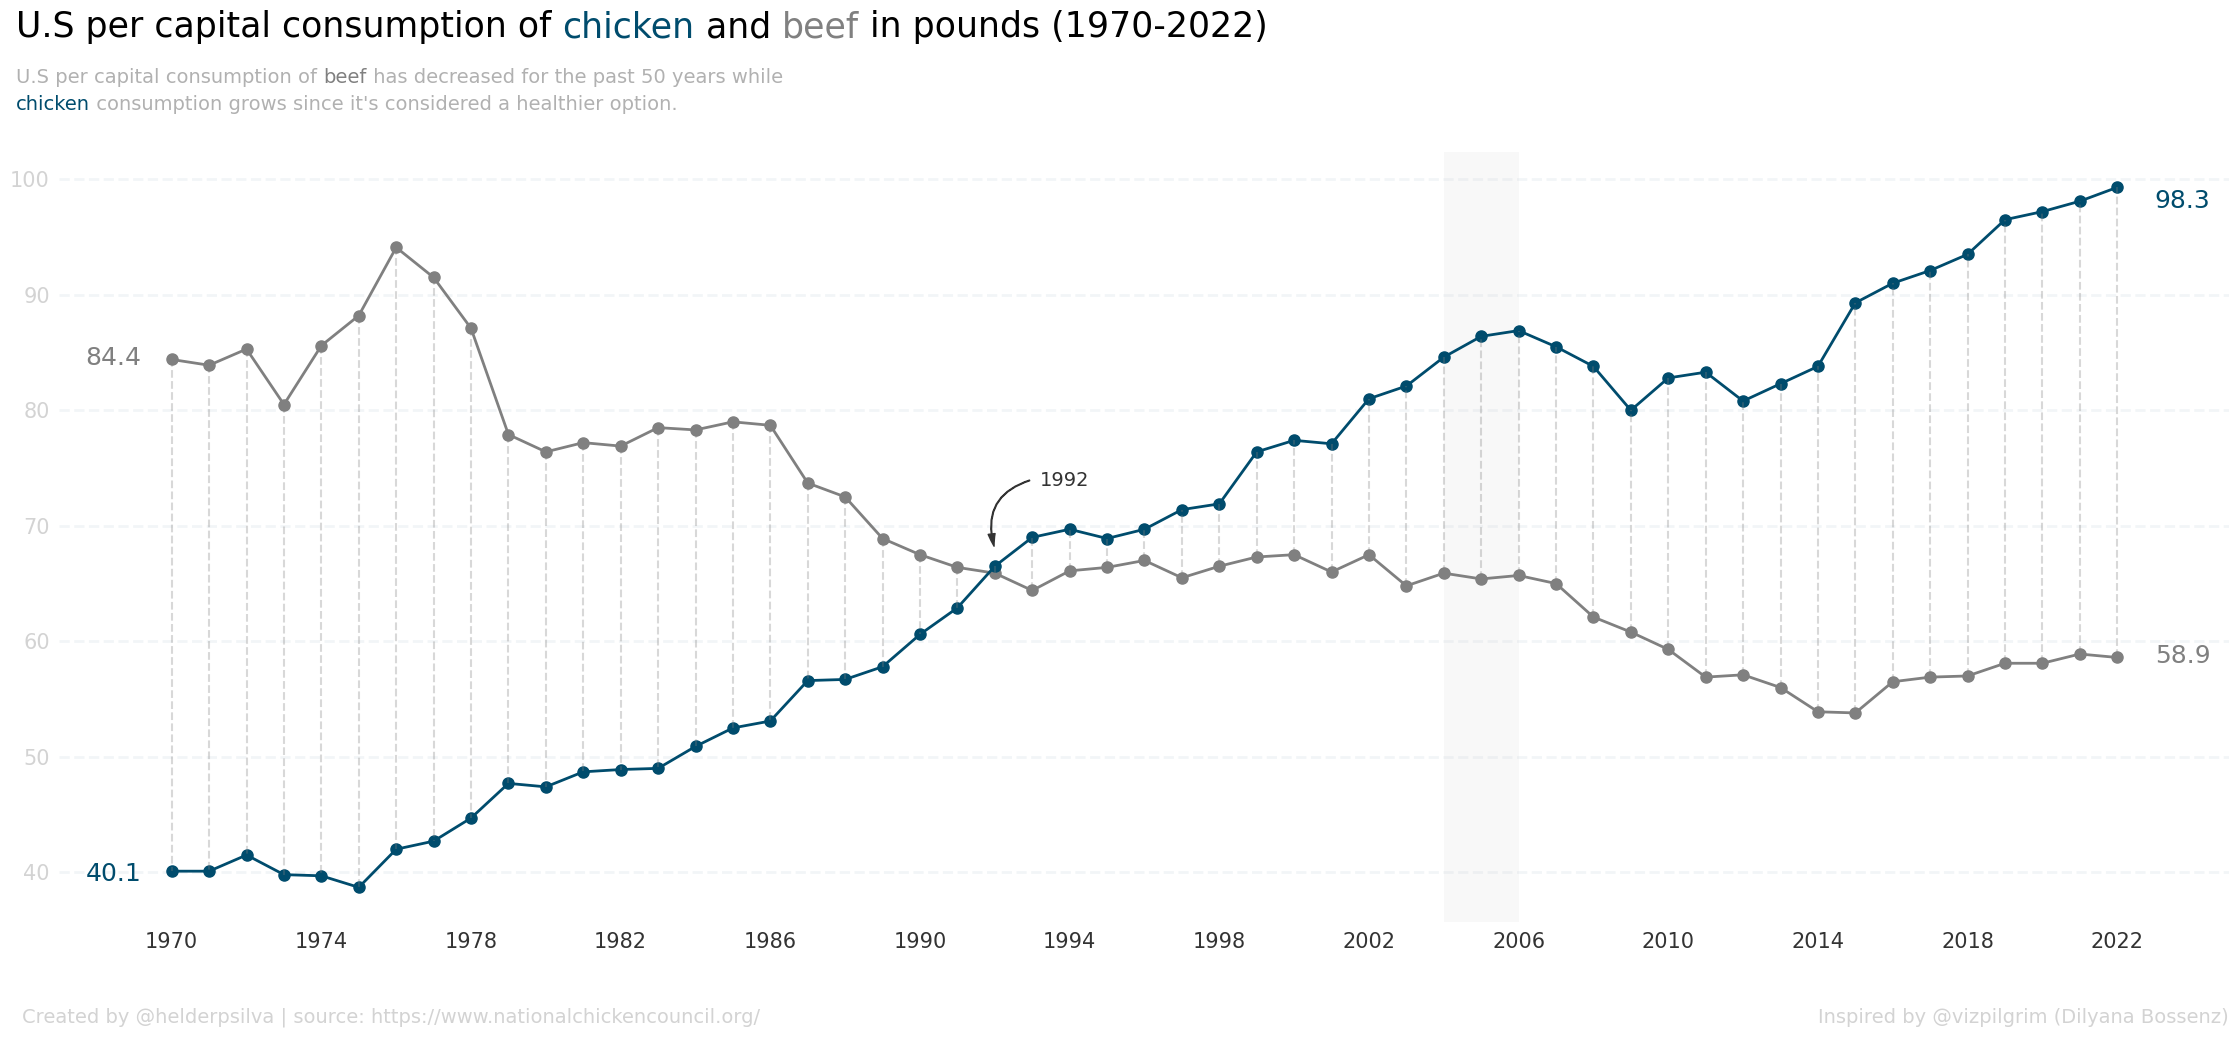

In [13]:
# Add shade to specified time period.

# colors.
blue_color = '#004c6d'
gray_color = 'gray'
lightgray_color = 'lightgray'
darkgray_color = '#333333'

fig, ax = plt.subplots(figsize=(28, 10))

# plot data.
ax.plot(data.year, data.beef, label='Beef', linewidth=2, marker='o', markersize = 8, color = gray_color)
ax.plot(data.year, data.chicken, label='Chicken', linewidth=2, marker='o', markersize = 8, color = blue_color)

# change default limits.
ax.set_xlim(1967, 2025)

# remove axis spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove tick marks.
ax.tick_params( bottom=False, left=False)

# Change tick size.
plt.xticks(np.arange(1970, 2023, 4), fontsize=15, color = darkgray_color) # x axis
plt.yticks(fontsize=15, color = lightgray_color) # y axis

# add horizontal grid.
ax.set_axisbelow(True)
ax.yaxis.grid(color = blue_color, linestyle='dashed', linewidth=2, alpha=0.05)

# custom labels.
# start values.
plt.text(1967.7, 83.9, "84.4", fontsize=18, color = gray_color)
plt.text(1967.7, 39.3, "40.1", fontsize=18, color = blue_color)

# end values.
plt.text(2023, 58.1, "58.9", fontsize=18, color = gray_color)
plt.text(2023, 97.5, "98.3", fontsize=18, color = blue_color)

# add connecting lines.
lines = []
for i, j in zip(x,y):
    pair = [(i, j[0]), (i, j[1])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, linewidth=1.5, linestyle='dashed', colors= gray_color, alpha = 0.3)
ax.add_collection(linecoll)

# add title.
title = ['U.S per capital consumption of ', 'chicken', ' and ', 'beef',' in pounds (1970-2022)'] # title separated based on the color.
title_color = ['k', '#004c6d', 'k', 'gray', 'k'] # list with respective colors.

# custom function for coloring text. (see cell above)
color_title(title, title_color, -0.020,1.15,25,ax)

# add subtitle.
line_one = ['U.S per capital consumption of ','beef',' has decreased for the past 50 years while ']
line_two = ['chicken', ' consumption grows since it\'s considered a healthier option.'] 

line_one_color = ['#B1B1B1', 'gray', '#B1B1B1']
line_two_color = ['#004c6d','#B1B1B1']

color_title(line_one, line_one_color, -0.020,1.09, 14 , ax)
color_title(line_two, line_two_color, -0.020,1.055, 14 , ax)

# add source and author.
plt.text(1966, 27, "Created by @helderpsilva | source: https://www.nationalchickencouncil.org/", fontsize=14, color = lightgray_color)
plt.text(2014, 27, "Inspired by @vizpilgrim (Dilyana Bossenz)" , fontsize=14, color = lightgray_color)

# add arrow on defined point.
kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=5, head_length=9", color = darkgray_color)
arrow = patches.FancyArrowPatch((1993, 74), (1992, 68), connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(arrow)

plt.text(1993.2, 73.5, "1992", fontsize=14, color = darkgray_color)

# add shade for specified period (2004-2006).
ax.axvspan(2004, 2006, alpha=0.15, color=lightgray_color, lw=0)

# show plot.
plt.show()

# plt.savefig('chicken.png', dpi = 300, bbox_inches = 'tight')